In [1]:
%load_ext autoreload
%autoreload 2

No handles with labels found to put in legend.


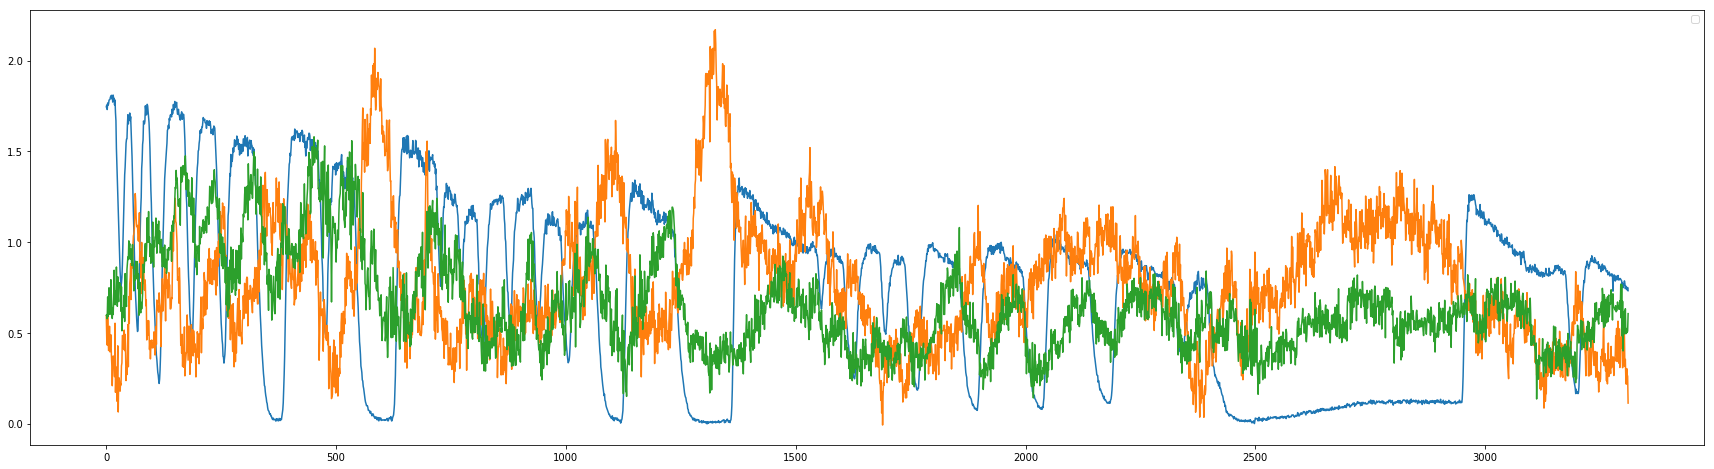

In [75]:
import data
import pylab as plt
import torch
import seaborn as sns

sensors = ['ALNL', 'ALNR', 'ASKL', 'ASKR', 'BAGL', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'PHAR']

plt.figure(figsize=(30,8))
traces = data.get_data()[sensors + ['AVAR']]
# sns.heatmap(traces.corr(), cmap='bwr', vmin=-1, vmax=1, annot=True)
plt.plot(traces['AVAR'].values)
# plt.plot((traces['OLQDR'].values - traces['ALNR'].values) * 5)
plt.plot((traces['ALNR'].values) * 5)
plt.plot((traces['OLQDR'].values) * 5)

plt.legend()
plt.show()


      ALNL      ALNR      ASKL      ASKR      BAGL     OLQVR      PHAR
0 -2.37117 -1.505366  0.670199  0.521296 -2.504467  2.412191 -0.698675
       ALNL      ALNR      ASKL      ASKR      BAGL     OLQVR      PHAR
0 -2.406986 -1.430182  0.695884  0.429169 -2.490942  2.388851 -0.791966
       ALNL      ALNR      ASKL     ASKR      BAGL     OLQVR      PHAR
0 -2.424224 -1.415424  0.669689  0.47778 -2.480879  2.560808 -0.702841
[0.5743683105902249, 0.5774403280026634, 0.5492304586389427]


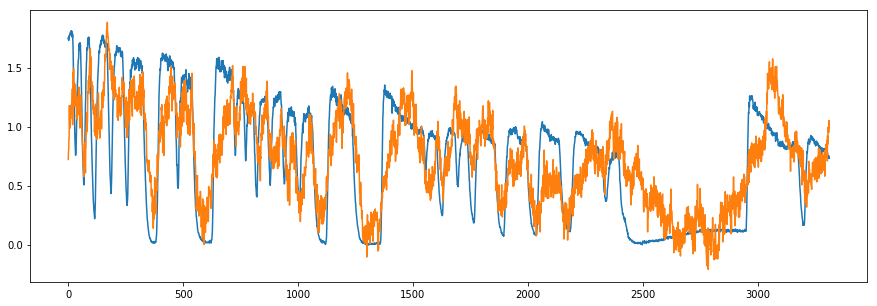

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import pandas as pd
from copy import copy

def predict(preds=sensors, yi='AVAR', deriv=False):

    df = data.get_data()
    X = df[preds]
    names = preds
    if deriv:
        X = pd.concat([X, df[preds].diff()], axis=1)
        X.fillna(0, inplace=True)
        names = names + ['d%s/dt'%n for n in preds]
    y = pd.DataFrame(df[yi])

    model = LinearRegression(normalize = True)
    scores = []
    kfold = KFold(n_splits=3, shuffle=True, random_state=42)
    for i, (train, test) in enumerate(kfold.split(X, y)):
        model.fit(X.iloc[train,:], y.iloc[train,:])
        print(pd.DataFrame(model.coef_, columns=names))
        score = model.score(X.iloc[test,:], y.iloc[test,:])
        scores.append(score)

    print(scores)
    plt.figure(figsize=(15,5))
    plt.plot(y)
    plt.plot(model.predict(X))
    plt.show()
    
sens = sensors.copy()
sens.remove('OLQDL')
sens.remove('OLQVL')
sens.remove('OLQDR')
# sens.remove('OLQVR')
predict(preds=sens, yi='AVAR')

In [ ]:
y = traces['AVAR']
X = 